    Land Stadt          Kategorie            Merkmal  Jahr  Einfuhr in to  \
0  de-sh  Kiel  transport_verkehr  Umschlag im Hafen  1988        2182900   
1  de-sh  Kiel  transport_verkehr  Umschlag im Hafen  1989        2814400   
2  de-sh  Kiel  transport_verkehr  Umschlag im Hafen  1990        2789300   
3  de-sh  Kiel  transport_verkehr  Umschlag im Hafen  1991        3002100   
4  de-sh  Kiel  transport_verkehr  Umschlag im Hafen  1992        2487100   

   Ausfuhr in to  
0        1204100  
1        1604200  
2        1568700  
3        1469600  
4        1333000  


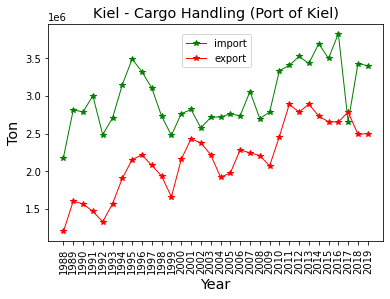

In [1]:
import io
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_URL = 'https://www.kiel.de/opendata/kiel_transport_verkehr_gueterumschlag_hafen.csv'

# fetch csv data
csv_data = requests.get(CSV_URL).content

# create a data frame
df = pd.read_csv(io.StringIO(csv_data.decode("latin1")), sep=";")

# print head (5 rows)
print(df.head())

# create a subplot
fig, ax = plt.subplots()

# drop not available (na) data
df_cleaned = df.dropna(how="all")

# np.uint16: Unsigned integer (0 to 65535)
df_years = df_cleaned["Jahr"].astype(np.uint16)

x = df_years.values
yi = df_cleaned["Einfuhr in to"].values
ye = df_cleaned["Ausfuhr in to"].values

plt.title("Kiel - Cargo Handling (Port of Kiel)", size="x-large")
plt.ylabel("Ton", size="x-large")
plt.xlabel("Year", size="x-large")

plt.plot(yi, "*-", markersize=6, linewidth=1, color="g", label="import")
plt.plot(ye, "*-", markersize=6, linewidth=1, color="r", label="export")

plt.legend(loc=(0.4, 0.8))

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation="vertical")

plt.show()